In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [2]:
from tqdm.auto import tqdm

In [4]:
from load_data import load_annotation, load_mouselight

In [ ]:
# axon length
# end point number
# internode lengths (mean) - does this mean something more than how annotation done?
# number branch points - is this where a parent is not the immediate preceding number?
# number of branches (is this the same?)
# soma location

In [5]:
#select 400 neurons at random

In [24]:
neuron_ids = np.random.choice(range(1,1507), size=50, replace=False)

In [6]:
def calculate_internode_length(data):
    lengtharray = np.zeros(len(data))
    for index, row in data[1:].iterrows():
        parent = data[data.sampleNumber==row.parentNumber].index
        point1 = np.array((data.x[parent], data.y[parent], data.z[parent])).flatten()
        point2 = np.array((row.x, row.y, row.z)).flatten()
        length = np.linalg.norm(point2-point1)
        lengtharray[index] = length
    return(lengtharray)


In [ ]:
##that's too slow

In [25]:
neuron_metrics = pd.DataFrame(columns=('neuron_id','total_axons_length','no_axons_end_points',
                                       'mean_axons_internode_length','no_axons_branch_points', 
                                       'total_dendrites_length','no_dendrites_end_points',
                                       'mean_dendrites_internode_length','no_dendrites_branch_points',
                                       'soma_location'), index=range(len(neuron_ids)))

for i,neuron_id in enumerate(neuron_ids):
    print(i)
    neuron = 'AA'+str(neuron_id).zfill(4)
    neuron_metrics.neuron_id.loc[i] = neuron
    (axons, dendrites) = load_mouselight(neuron)
    
    inter_node = (axons.sampleNumber - axons.parentNumber).values
    endpoints = np.argwhere(inter_node>1).flatten() - 1
    neuron_metrics.no_axons_end_points.loc[i] = len(endpoints)
    branch_points = axons.parentNumber.loc[endpoints+1].values
    neuron_metrics.no_axons_branch_points.loc[i] = len(np.unique(branch_points))
    lengtharray = calculate_internode_length(axons)
    axons['InterNodeLength'] = lengtharray
    neuron_metrics.mean_axons_internode_length.loc[i] = axons['InterNodeLength'].mean()
    neuron_metrics.total_axons_length.loc[i] = axons.InterNodeLength.sum()
                              
    inter_node = (dendrites.sampleNumber - dendrites.parentNumber).values
    endpoints = np.argwhere(inter_node>1).flatten() - 1
    neuron_metrics.no_dendrites_end_points.loc[i] = len(endpoints)
    branch_points = dendrites.parentNumber.loc[endpoints+1].values
    neuron_metrics.no_dendrites_branch_points.loc[i] = len(np.unique(branch_points))
    lengtharray = calculate_internode_length(dendrites)
    dendrites['InterNodeLength'] = lengtharray
    neuron_metrics.mean_dendrites_internode_length.loc[i] = dendrites['InterNodeLength'].mean()
    neuron_metrics.total_dendrites_length.loc[i] = dendrites.InterNodeLength.sum()
                              
    neuron_metrics.soma_location.loc[i] = axons.allenId.loc[0]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45


AttributeError: 'DataFrame' object has no attribute 'sampleNumber'

In [34]:
neuron = 'AA'+str(neuron_ids[i]).zfill(4)

In [38]:
neuron

'AA0114'

In [35]:
(axons, dendrites) = load_mouselight(neuron)

In [37]:
axons

,sampleNumber,structureIdentifier,x,y,z,radius,parentNumber,allenId
0,1,1,2788.077305,3078.834161,7532.659265,1.0,-1,767
1,2,2,2788.119297,3080.297446,7532.245065,1.0,1,767
2,3,2,2794.125540,3081.303682,7527.244512,1.0,2,767
3,4,2,2802.176832,3084.036482,7522.579841,1.0,3,767
4,5,2,2808.183075,3084.791159,7519.579509,1.0,4,767
...,...,...,...,...,...,...,...,...
10020,10021,2,2739.461597,2927.095554,7371.526076,0.5,10020,767
10021,10022,2,2736.858930,2917.730028,7365.283391,0.5,10021,767
10022,10023,2,2724.995986,2904.491112,7360.486322,0.5,10022,767
10023,10024,2,2711.429726,2891.896746,7352.423021,0.5,10023,767


In [26]:
len(neuron_metrics.soma_location.unique())

32

In [27]:
neuron_metrics

,neuron_id,total_axons_length,no_axons_end_points,mean_axons_internode_length,no_axons_branch_points,total_dendrites_length,no_dendrites_end_points,mean_dendrites_internode_length,no_dendrites_branch_points,soma_location
0,AA0873,88473.67714,192,28.96977,192,6360.175718,54,16.142578,48,962.0
1,AA0054,124686.202133,354,16.968726,354,10521.074488,86,12.480515,79,362
2,AA0567,51749.446743,140,56.495029,140,7232.494424,63,29.281354,58,443
3,AA0385,36584.540864,77,7.000486,77,3183.439667,22,20.671686,17,10703
4,AA1262,71081.955056,338,6.799498,337,5209.841467,36,25.413861,32,625
5,AA1444,156522.724239,569,9.058552,569,10372.918618,89,11.922895,85,362
6,AA0202,3646.58474,7,7.742218,7,3420.394409,15,6.196367,15,10703
7,AA0445,420740.75266,695,25.712935,695,11158.198664,83,24.851222,77,767.0
8,AA1248,44141.357275,215,10.768811,215,11733.783556,96,7.75531,90,778.0
9,AA0726,121507.639398,276,30.831677,276,11625.085961,91,14.641166,79,767


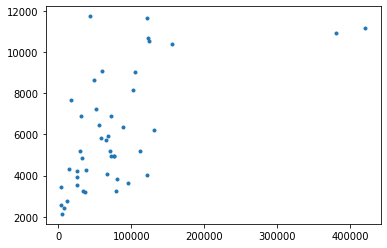

In [28]:
plt.plot(neuron_metrics.total_axons_length, neuron_metrics.total_dendrites_length, '.')

Exception ignored in: <function tqdm.__del__ at 0x7ff257c3f3a0>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.8/site-packages/tqdm/std.py", line 1128, in __del__
    self.close()
  File "/opt/conda/lib/python3.8/site-packages/tqdm/notebook.py", line 261, in close
    self.sp(bar_style='danger')
AttributeError: 'tqdm' object has no attribute 'sp'


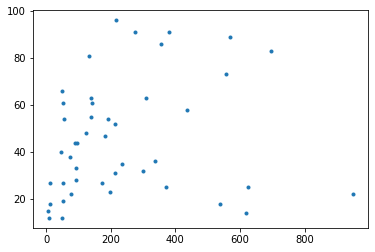

In [29]:
plt.plot(neuron_metrics.no_axons_end_points, neuron_metrics.no_dendrites_end_points, '.')